This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month'])

In [4]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df.tail()

,Month,#Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [6]:
df.iloc[:,1][:5]

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

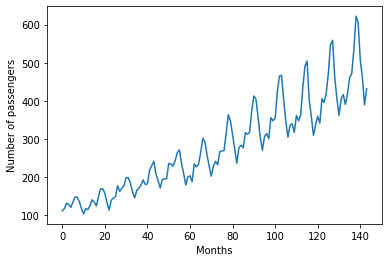

In [7]:
plt.plot(df['#Passengers'])
plt.ylabel('Number of passengers')
plt.xlabel('Months')
plt.show()

## Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
df.iloc[:,1].shape

(144,)

In [10]:
mc = MinMaxScaler(feature_range=(0,1))

data = mc.fit_transform(df.iloc[:,1:]) #  we can Scale only a 2d array 

In [11]:
data.shape

(144, 1)

In [12]:
data[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [13]:
len(data)

144

In [14]:
## SPlitting to test and train data
train_size = int(len(data)*0.65)

In [15]:
train_size

93

In [17]:
test_size = (len(data))- train_size

In [18]:
test_size

51

In [20]:
train_data,test_data = data[0:train_size,:],data[train_size:len(data),:1]

In [21]:
train_data[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [22]:
train_data.shape

(93, 1)

In [24]:
test_data.shape

(51, 1)

In [25]:
test_data[:5]

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888]])

In [27]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
X_train.shape, y_train.shape


((88, 4), (88,))

In [30]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [31]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [34]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), batch_size=1, verbose=1, epochs=100)

Train on 88 samples, validate on 46 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
88/88 [==============================] - 6s 72ms/sample - loss: 0.0128 - val_loss: 0.0359
Epoch 2/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0060 - val_loss: 0.0296
Epoch 3/100
88/88 [==============================] - 1s 15ms/sample - loss: 0.0064 - val_loss: 0.0322
Epoch 4/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0054 - val_loss: 0.0361
Epoch 5/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0062 - val_loss: 0.0258
Epoch 6/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0052 - val_loss: 0.0256
Epoch 7/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0054 - val_loss: 0.0238
Epoch 8/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0050 - val_loss: 0.0235
Epoch 9/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0052 - val_los

88/88 [==============================] - 2s 19ms/sample - loss: 0.0019 - val_loss: 0.0096
Epoch 78/100
88/88 [==============================] - 2s 19ms/sample - loss: 0.0018 - val_loss: 0.0161
Epoch 79/100
88/88 [==============================] - 2s 20ms/sample - loss: 0.0018 - val_loss: 0.0161
Epoch 80/100
88/88 [==============================] - 2s 24ms/sample - loss: 0.0018 - val_loss: 0.0069
Epoch 81/100
88/88 [==============================] - 2s 18ms/sample - loss: 0.0019 - val_loss: 0.0109
Epoch 82/100
88/88 [==============================] - 2s 17ms/sample - loss: 0.0018 - val_loss: 0.0081
Epoch 83/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0018 - val_loss: 0.0119
Epoch 84/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0018 - val_loss: 0.0123
Epoch 85/100
88/88 [==============================] - 1s 16ms/sample - loss: 0.0019 - val_loss: 0.0198
Epoch 86/100
88/88 [==============================] - 1s 17ms/sample - loss: 0.0023 - 

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [40]:
train_predict=mc.inverse_transform(train_predict)
test_predict=mc.inverse_transform(test_predict)

In [41]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

217.22443329550032

In [42]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(ytest,test_predict))

378.3217072917896

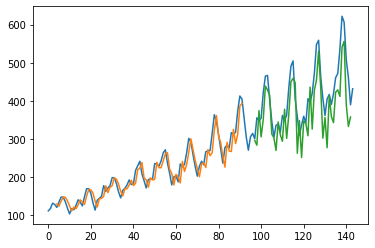

In [45]:

### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(mc.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()